In [236]:
from feature_extraction import get_all_features
from classification import *
from visualisation import plot2D, show_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [237]:
features_raw, labels = get_all_features("results")
scaler = StandardScaler()
features = scaler.fit_transform(features_raw)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# All Features

c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


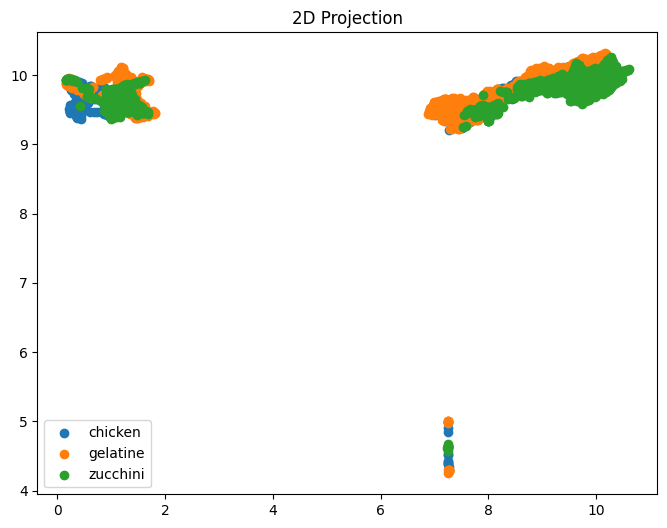

In [238]:
import numpy as np
X_2d = reduce_dimensionality_UMAP(features, 10)
#X_2d = reduce_dimensionality_VAE(features, latent_dim=10, epochs=50)
plot2D(X_2d, labels)

              precision    recall  f1-score   support

     chicken       0.85      0.82      0.84       343
    gelatine       0.89      0.94      0.91       406
    zucchini       0.91      0.89      0.90       429

    accuracy                           0.89      1178
   macro avg       0.89      0.88      0.88      1178
weighted avg       0.89      0.89      0.89      1178



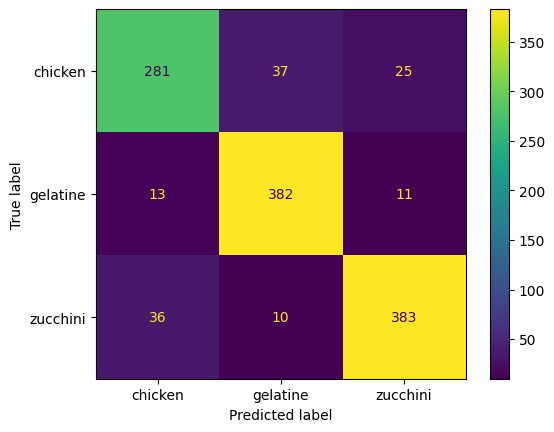

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

In [240]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_clusters(X_2d, labels, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_2d)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Class': labels})
    print(df.groupby(['Cluster', 'Class']).size().unstack(fill_value=0))

    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=cluster_labels, palette='tab10')
    plt.title("Clusters detected by KMeans")
    plt.show()


Class    chicken  gelatine  zucchini
Cluster                             
0            249       444        66
1            312       347       288
2            582       561      1075


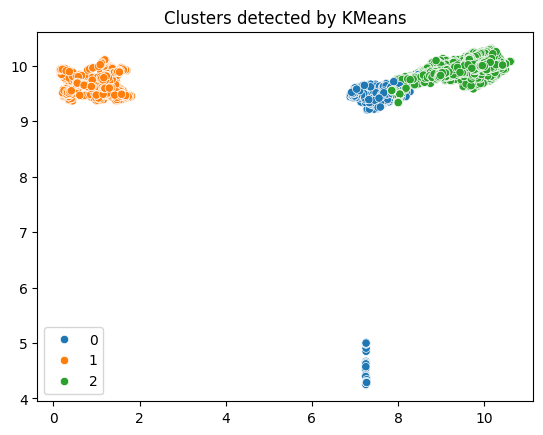

In [241]:
analyze_clusters(X_2d, labels, n_clusters=3)

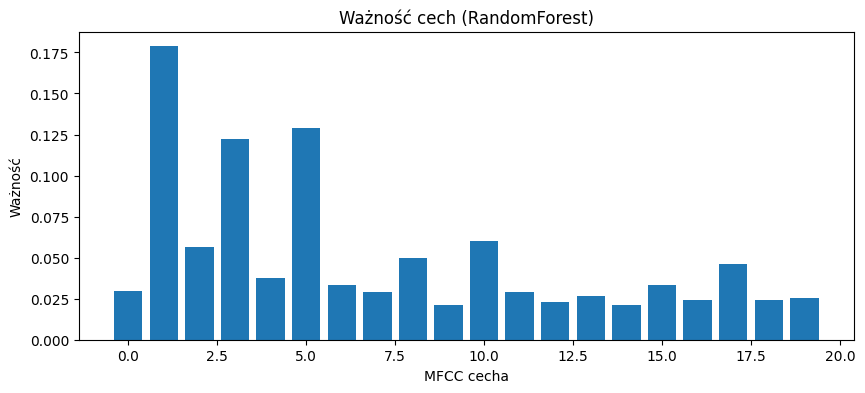

In [242]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(features, labels_encoded) 

importances = clf.feature_importances_

plt.figure(figsize=(10,4))
plt.bar(range(len(importances)), importances)
plt.title("Ważność cech (RandomForest)")
plt.xlabel("MFCC cecha")
plt.ylabel("Ważność")
plt.show()


In [243]:
import pandas as pd
import numpy as np

df = pd.DataFrame(features, columns=[f"MFCC_{i}" for i in range(features.shape[1])])
df["UMAP1"] = X_2d[:, 0]
df["UMAP2"] = X_2d[:, 1]

correlations = df.corr()[["UMAP1", "UMAP2"]].drop(index=["UMAP1", "UMAP2"])
# print(correlations.sort_values("UMAP1", ascending=False))


In [244]:
# Najbardziej istotne cechy w ujęciu absolutnym (zarówno dodatnie, jak i ujemne)
correlations["abs_corr"] = correlations["UMAP1"].abs() + correlations["UMAP2"].abs()
top_features = correlations.sort_values("abs_corr", ascending=False).head(15)
# print(top_features)


# Select 5 most important

In [245]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(features, labels_encoded)

f_df = pd.DataFrame({
    "feature": [f"MFCC_{i}" for i in range(features.shape[1])],
    "f_value": f_values,
    "p_value": p_values
})

top_features = f_df.sort_values("f_value", ascending=False)
print(top_features.head(20))


    feature      f_value       p_value
1    MFCC_1  1614.074341  0.000000e+00
3    MFCC_3   965.796326  0.000000e+00
5    MFCC_5   659.074463  0.000000e+00
8    MFCC_8   512.180603  0.000000e+00
10  MFCC_10   460.480560  0.000000e+00
17  MFCC_17   446.105011  0.000000e+00
19  MFCC_19   213.244095  0.000000e+00
2    MFCC_2   182.216873  0.000000e+00
6    MFCC_6   170.619003  0.000000e+00
13  MFCC_13   101.779404  8.127531e-44
15  MFCC_15    56.363140  7.363154e-25
11  MFCC_11    56.107986  9.435953e-25
4    MFCC_4    45.503513  2.910221e-20
14  MFCC_14    26.210529  4.924161e-12
7    MFCC_7    25.695108  8.189403e-12
12  MFCC_12    24.720518  2.143573e-11
16  MFCC_16    22.485397  1.951154e-10
9    MFCC_9    16.700647  5.994035e-08
0    MFCC_0    12.594645  3.529474e-06
18  MFCC_18     3.930461  1.971203e-02


In [246]:
selected_cols = top_features.head(5)["feature"].tolist()
X_selected = df[selected_cols].values

c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


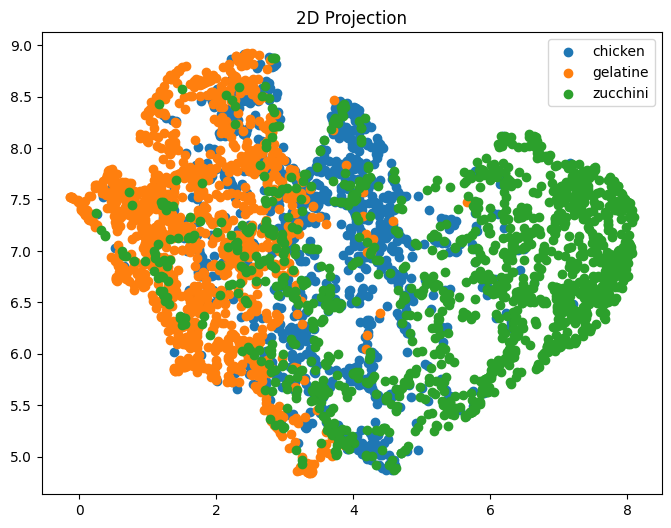

In [247]:
X_umap = reduce_dimensionality_UMAP(X_selected, 15)
#X_2d = reduce_dimensionality_VAE(features, latent_dim=10, epochs=50)
plot2D(X_umap, labels)

              precision    recall  f1-score   support

     chicken       0.69      0.71      0.70       343
    gelatine       0.85      0.85      0.85       406
    zucchini       0.83      0.81      0.82       429

    accuracy                           0.80      1178
   macro avg       0.79      0.79      0.79      1178
weighted avg       0.80      0.80      0.80      1178



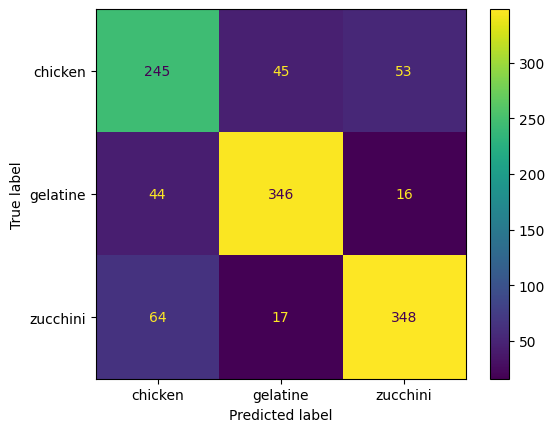

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Class    chicken  gelatine  zucchini
Cluster                             
0            359      1203       116
1             62         1       893
2            722       148       420


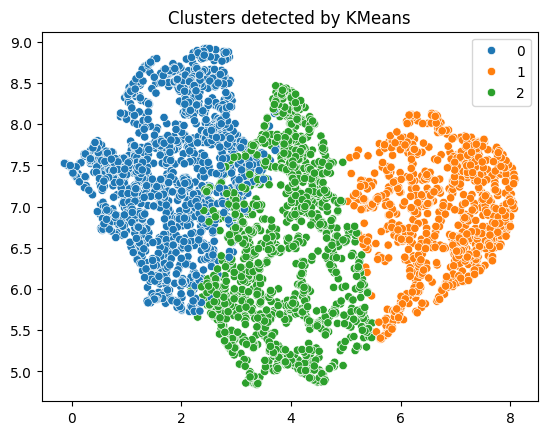

In [249]:
analyze_clusters(X_umap, labels, n_clusters=3)

### With denoising

In [250]:
features_raw, labels = get_all_features("results_denoised")
scaler = StandardScaler()
features = scaler.fit_transform(features_raw)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [251]:
f_values, p_values = f_classif(features, labels_encoded)
df = pd.DataFrame(features, columns=[f"MFCC_{i}" for i in range(features.shape[1])])

f_df = pd.DataFrame({
    "feature": [f"MFCC_{i}" for i in range(features.shape[1])],
    "f_value": f_values,
    "p_value": p_values
})

top_features = f_df.sort_values("f_value", ascending=False)
print(top_features.head(10))

selected_cols = top_features.head(9)["feature"].tolist()
X_selected = df[selected_cols].values

    feature      f_value       p_value
1    MFCC_1  1300.295044  0.000000e+00
5    MFCC_5   837.809570  0.000000e+00
3    MFCC_3   586.606262  0.000000e+00
17  MFCC_17   505.475983  0.000000e+00
10  MFCC_10   492.024414  0.000000e+00
8    MFCC_8   464.482574  0.000000e+00
6    MFCC_6   250.770996  0.000000e+00
2    MFCC_2   228.757401  0.000000e+00
19  MFCC_19   168.232010  0.000000e+00
11  MFCC_11   102.453751  3.783506e-44


c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


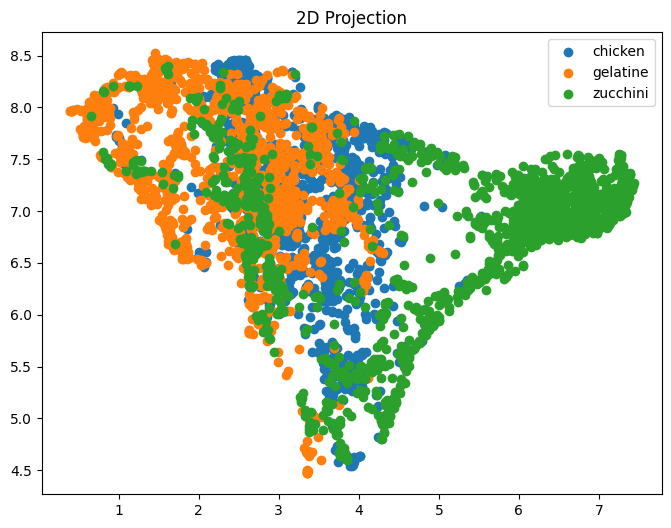

In [252]:
X_umap = reduce_dimensionality_UMAP(X_selected, 15)
plot2D(X_umap, labels)

              precision    recall  f1-score   support

     chicken       0.77      0.76      0.77       363
    gelatine       0.87      0.91      0.89       416
    zucchini       0.88      0.85      0.87       455

    accuracy                           0.85      1234
   macro avg       0.84      0.84      0.84      1234
weighted avg       0.85      0.85      0.85      1234



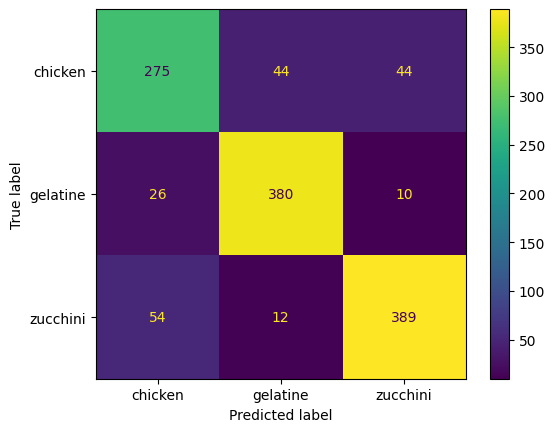

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Class    chicken  gelatine  zucchini
Cluster                             
0            599      1104        90
1             52         0       994
2            558       282       434


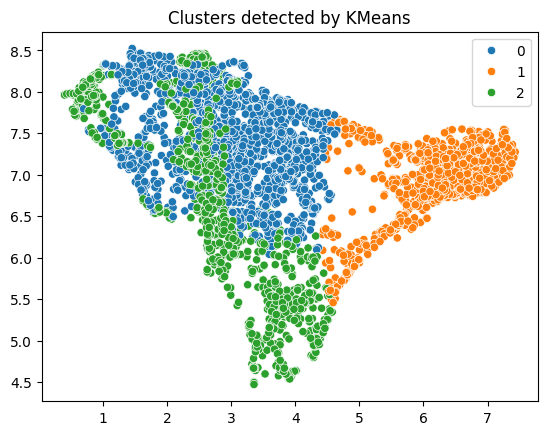

In [254]:
analyze_clusters(X_umap, labels, n_clusters=3)

# Różne prędkości:
### Slow

In [255]:
features_raw, labels = get_all_features("results_slow")
scaler = StandardScaler()
features = scaler.fit_transform(features_raw)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [256]:
f_values, p_values = f_classif(features, labels_encoded)
df = pd.DataFrame(features, columns=[f"MFCC_{i}" for i in range(features.shape[1])])

f_df = pd.DataFrame({
    "feature": [f"MFCC_{i}" for i in range(features.shape[1])],
    "f_value": f_values,
    "p_value": p_values
})

top_features = f_df.sort_values("f_value", ascending=False)
print(top_features.head(10))

selected_cols = top_features.head(9)["feature"].tolist()
X_selected = df[selected_cols].values

    feature     f_value       p_value
1    MFCC_1  245.588745  0.000000e+00
5    MFCC_5  111.508423  7.707142e-44
2    MFCC_2  108.043701  1.228939e-42
3    MFCC_3   70.620850  3.792827e-29
8    MFCC_8   70.382584  4.655955e-29
9    MFCC_9   46.931648  4.407144e-20
7    MFCC_7   41.905277  4.215519e-18
17  MFCC_17   36.454014  6.262027e-16
19  MFCC_19   29.698956  3.335330e-13
15  MFCC_15   25.048012  2.651264e-11


c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


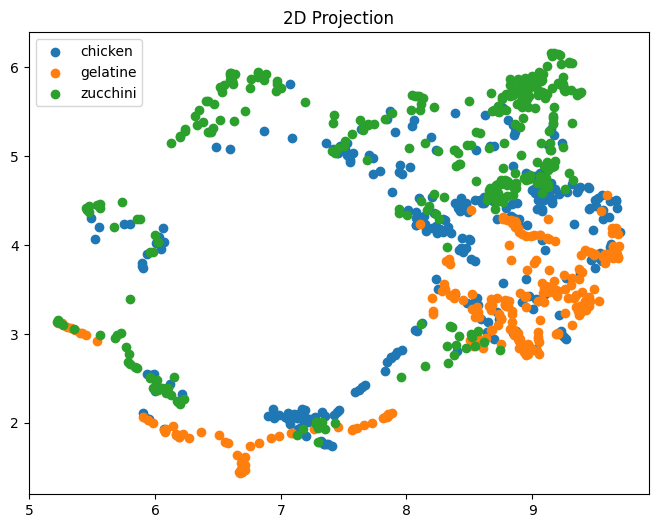

In [257]:
X_umap = reduce_dimensionality_UMAP(X_selected, 15)
plot2D(X_umap, labels)

              precision    recall  f1-score   support

     chicken       0.72      0.71      0.71        85
    gelatine       0.81      0.84      0.82        75
    zucchini       0.86      0.85      0.86       102

    accuracy                           0.80       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.80      0.80      0.80       262



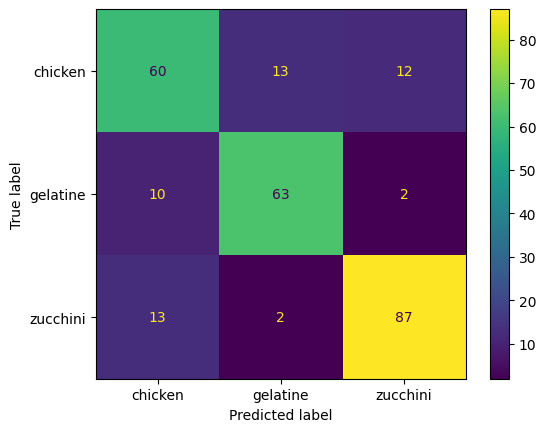

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Class    chicken  gelatine  zucchini
Cluster                             
0            110       189        30
1             71        58        59
2            103         1       252


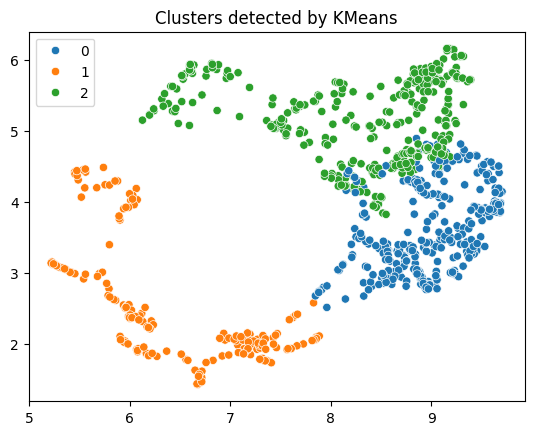

In [259]:
analyze_clusters(X_umap, labels, n_clusters=3)

### Medium

In [260]:
features_raw, labels = get_all_features("results_medium")
scaler = StandardScaler()
features = scaler.fit_transform(features_raw)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [265]:
f_values, p_values = f_classif(features, labels_encoded)
df = pd.DataFrame(features, columns=[f"MFCC_{i}" for i in range(features.shape[1])])

f_df = pd.DataFrame({
    "feature": [f"MFCC_{i}" for i in range(features.shape[1])],
    "f_value": f_values,
    "p_value": p_values
})

top_features = f_df.sort_values("f_value", ascending=False)
print(top_features.head(10))

selected_cols = top_features.head(5)["feature"].tolist()
X_selected = df[selected_cols].values

    feature      f_value       p_value
1    MFCC_1  1055.670776  0.000000e+00
3    MFCC_3   653.005005  0.000000e+00
8    MFCC_8   485.354584  0.000000e+00
5    MFCC_5   325.743042  0.000000e+00
10  MFCC_10   303.262939  0.000000e+00
13  MFCC_13   183.768433  0.000000e+00
17  MFCC_17   173.730469  0.000000e+00
16  MFCC_16   137.173264  0.000000e+00
2    MFCC_2   120.734222  0.000000e+00
18  MFCC_18   103.977081  2.662467e-44


c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


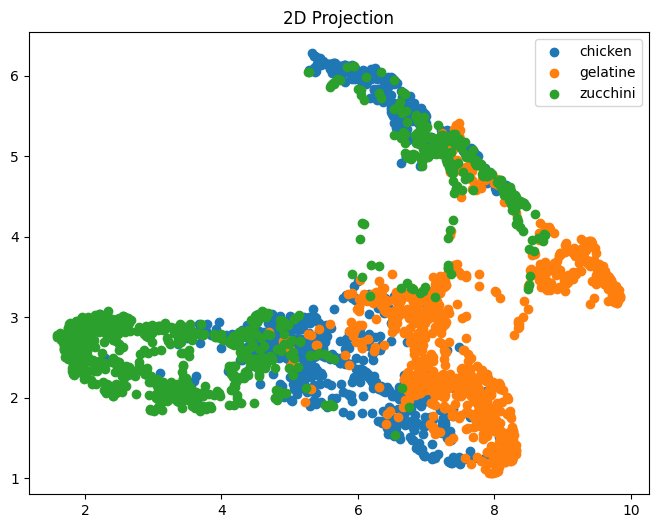

In [266]:
X_umap = reduce_dimensionality_UMAP(X_selected, 15)
plot2D(X_umap, labels)

              precision    recall  f1-score   support

     chicken       0.80      0.83      0.82       265
    gelatine       0.91      0.89      0.90       288
    zucchini       0.88      0.86      0.87       301

    accuracy                           0.86       854
   macro avg       0.86      0.86      0.86       854
weighted avg       0.86      0.86      0.86       854



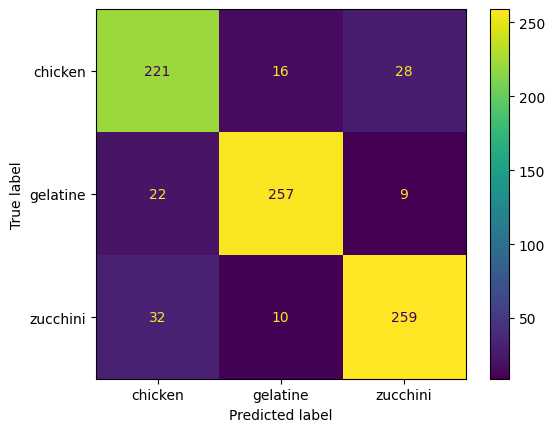

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Class    chicken  gelatine  zucchini
Cluster                             
0            270       278       239
1            168         2       726
2            446       678        38


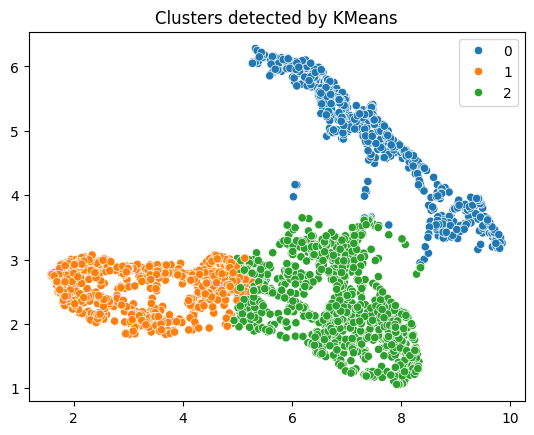

In [269]:
analyze_clusters(X_umap, labels, n_clusters=3)

### Fast

In [270]:
features_raw, labels = get_all_features("results_fast")
scaler = StandardScaler()
features = scaler.fit_transform(features_raw)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [271]:
f_values, p_values = f_classif(features, labels_encoded)
df = pd.DataFrame(features, columns=[f"MFCC_{i}" for i in range(features.shape[1])])

f_df = pd.DataFrame({
    "feature": [f"MFCC_{i}" for i in range(features.shape[1])],
    "f_value": f_values,
    "p_value": p_values
})

top_features = f_df.sort_values("f_value", ascending=False)
print(top_features.head(10))

selected_cols = top_features.head(9)["feature"].tolist()
X_selected = df[selected_cols].values

    feature      f_value       p_value
1    MFCC_1  1077.482788  0.000000e+00
17  MFCC_17   559.642883  0.000000e+00
5    MFCC_5   525.189087  0.000000e+00
19  MFCC_19   509.326599  0.000000e+00
8    MFCC_8   467.392181  0.000000e+00
3    MFCC_3   398.632172  0.000000e+00
10  MFCC_10   346.883789  0.000000e+00
6    MFCC_6   305.589355  0.000000e+00
15  MFCC_15   124.128845  0.000000e+00
2    MFCC_2    91.207909  2.080741e-38


c:\Users\sokol\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


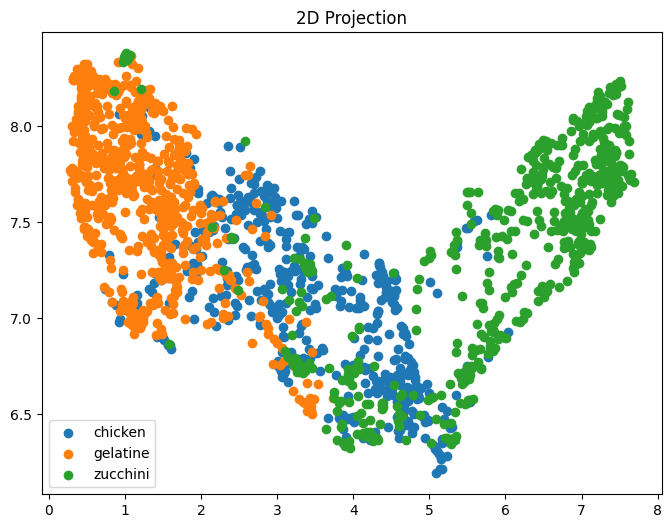

In [272]:
X_umap = reduce_dimensionality_UMAP(X_selected, 15)
plot2D(X_umap, labels)

              precision    recall  f1-score   support

     chicken       0.77      0.79      0.78       149
    gelatine       0.88      0.92      0.90       205
    zucchini       0.91      0.84      0.87       173

    accuracy                           0.86       527
   macro avg       0.85      0.85      0.85       527
weighted avg       0.86      0.86      0.86       527



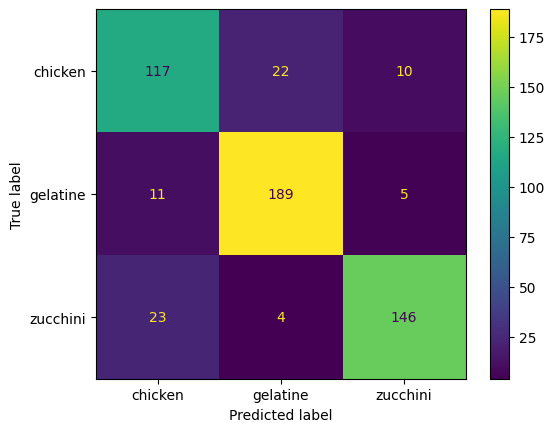

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_umap, labels, test_size=0.3, random_state=42, stratify=labels)
clf = fit_classifier(X_train, y_train, 3)
y_pred = evaluate_classifier(clf, X_test, y_test)
show_confusion_matrix(y_pred, y_test, display_labels=clf.classes_)

Class    chicken  gelatine  zucchini
Cluster                             
0            167       648        17
1             14         0       415
2            315        34       145


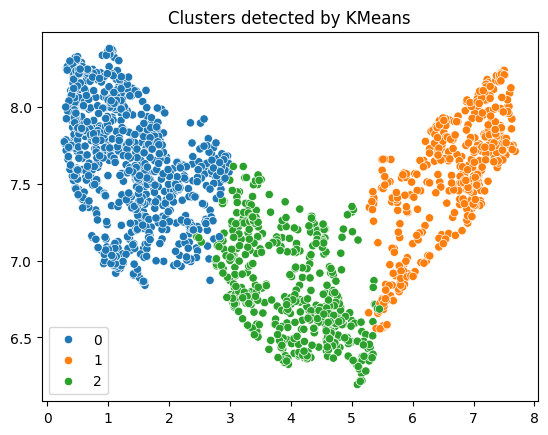

In [274]:
analyze_clusters(X_umap, labels, n_clusters=3)